In [2]:
pip install pyspark

     |████████████████████████████████| 212.4MB 69kB/s 
     |████████████████████████████████| 204kB 19.7MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=57adb4955e8e15ed8ca4acc35caf3a2ab2af557ae9f75b5eba27dd8334296a1d
  Stored in directory: /root/.cache/pip/wheels/40/1b/2c/30f43be2627857ab80062bef1527c0128f7b4070b6b2d02139
Successfully built pyspark


## **Heart Attack Dataset**

Characteristics about this dataset:


*   Age: Age of the patient;
*   Sex: Sex of the patient;
*   exang: exercise induced angina(1 = yes, 0 = no) -> It is a medical condition of cardiac patients;
*   ca: number of major vessels(0-3);
*   cp: Chest Pain type: 
      *   Value 1: typical angina;
      *   Value 2: atypical angina;
      *   Value 3: non-anginal pain;
      *   Value 4: asymptomatic.
*   trtbps: resting blood pressure(in mm Hg);
*   chol: cholestoral in mg/dl fetched via BMI sensor;
*   fbs: fasting blood sugar > 120 mg/dl(1 = true, 0 = false);
*   rest_ecg: resting electrocardiographic results
     *   Value 0: normal;
     *   Value 1: having ST-T wave abnormality(T wave inversions and/or ST elevation or depression of > 0.05mV;
     *   Value 2: showing probable or definite left ventricualr hypertrophy by Estes' criteria. 
*   thalach: maximum heart rate achieved
*   target: 0=less chance of heart attack 1=more chanhe of heart attack.















# **1. Importam librariile**

In [292]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession

# **2. Incarcam datele din 'heart.csv'**

In [293]:
df_1 = pd.read_csv('/content/sample_data/heart.csv')

In [294]:
df_1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [246]:
df_1.shape

(303, 14)

#**3. Analiza datelor**

**3.1. Verificam daca exista valori null**

In [247]:
df_1.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [248]:
df_1.isnull().sum().any()

False

**Observam ca setul de date ales nu contine valori null.**

**3.2 Verificam daca sunt duplicate**

In [296]:
df_1.loc[df_1.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [301]:
df_1.duplicated().sum()

1

In [302]:
df = df_1.drop_duplicates()

In [303]:
df.duplicated().sum()

0

**3.3 Afisam statisticile descriptive**

In [304]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trtbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalachh,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exng,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


**3.4 Afisam cate valori de 0 si 1 sunt pe coloana 'output'**

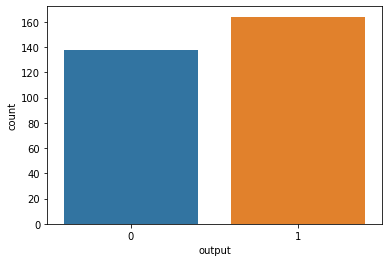

In [255]:
sns.countplot(x=df['output']);

**3.5 Analizare date**

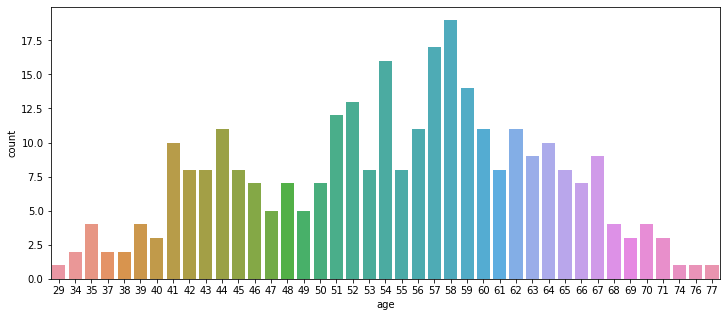

In [393]:
plt.figure(figsize=(12, 5))
sns.countplot(x=df['age'])

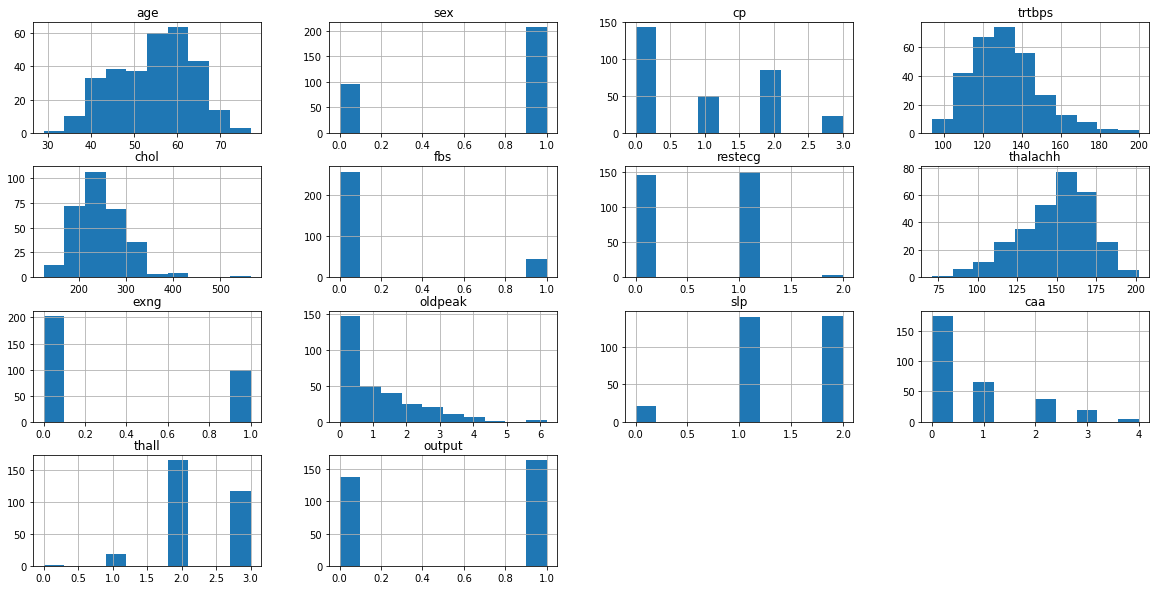

In [256]:
df.hist(figsize=(20,10))
plt.show()

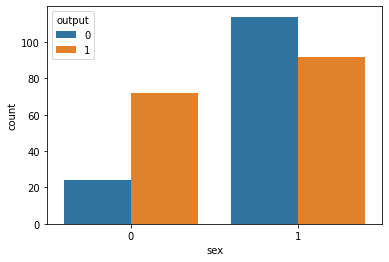

In [257]:
sns.countplot(x = df['sex'], hue=df['output'])

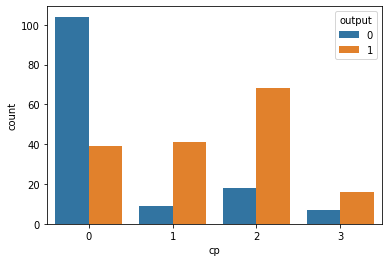

In [258]:
sns.countplot(x = df['cp'], hue=df['output'])

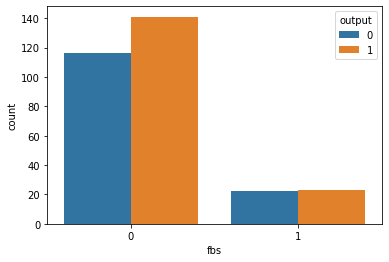

In [259]:
sns.countplot(x = df['fbs'], hue=df['output'])

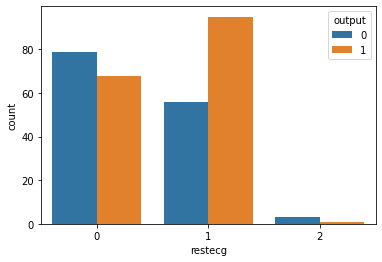

In [260]:
sns.countplot(x = df['restecg'], hue=df['output'])

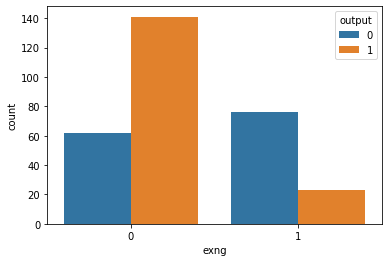

In [261]:
sns.countplot(x = df['exng'], hue=df['output'])

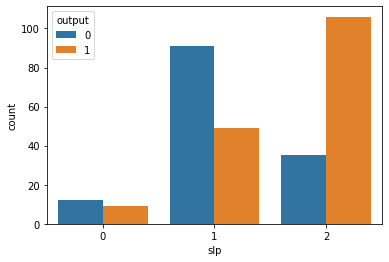

In [262]:
sns.countplot(x = df['slp'], hue=df['output'])

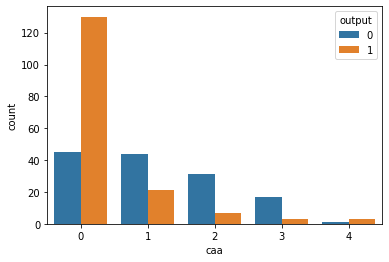

In [263]:
sns.countplot(x = df['caa'], hue=df['output'])

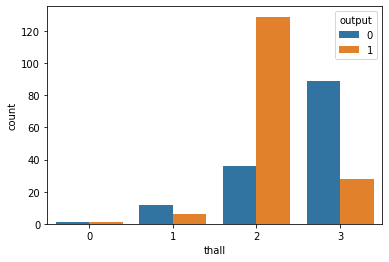

In [264]:
sns.countplot(x = df['thall'], hue=df['output'])

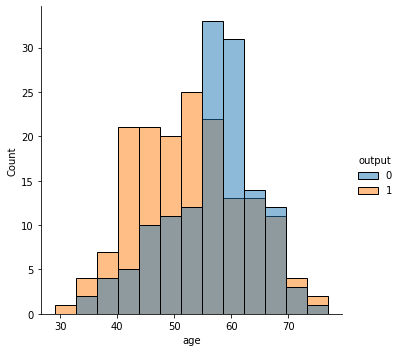

In [397]:
sns.displot(x=df['age'], hue=df['output'])

# **4. Analizarea datelor cu ajutorul lui SparkSQL**

In [265]:
spark1 = SparkSession.builder.appName('SQL').getOrCreate()

In [266]:
df_sql = spark1.read.csv('/content/sample_data/heart.csv',inferSchema=True,header=True)

In [267]:
df_sql.printSchema()

root
 |-- age: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- cp: integer (nullable = true)
 |-- trtbps: integer (nullable = true)
 |-- chol: integer (nullable = true)
 |-- fbs: integer (nullable = true)
 |-- restecg: integer (nullable = true)
 |-- thalachh: integer (nullable = true)
 |-- exng: integer (nullable = true)
 |-- oldpeak: double (nullable = true)
 |-- slp: integer (nullable = true)
 |-- caa: integer (nullable = true)
 |-- thall: integer (nullable = true)
 |-- output: integer (nullable = true)



In [268]:
df_sql.createOrReplaceTempView('heart')

In [269]:
result = spark1.sql("select count(output) from heart where output = 1")
result.show()

+-------------+
|count(output)|
+-------------+
|          165|
+-------------+



In [171]:
result = spark1.sql("select count(output) from heart where output = 0")
result.show()

+-------------+
|count(output)|
+-------------+
|          138|
+-------------+



In [172]:
result = spark1.sql("select trtbps, output, count(output) from heart group by trtbps, output order by 3 desc")
result.show()

+------+------+-------------+
|trtbps|output|count(output)|
+------+------+-------------+
|   120|     1|           23|
|   130|     1|           23|
|   140|     1|           17|
|   140|     0|           15|
|   120|     0|           14|
|   130|     0|           13|
|   110|     0|           11|
|   138|     1|           10|
|   150|     1|            9|
|   150|     0|            8|
|   110|     1|            8|
|   125|     0|            7|
|   128|     1|            6|
|   160|     0|            6|
|   128|     0|            6|
|   160|     1|            5|
|   112|     1|            5|
|   135|     1|            5|
|   118|     1|            5|
|   132|     0|            5|
+------+------+-------------+
only showing top 20 rows



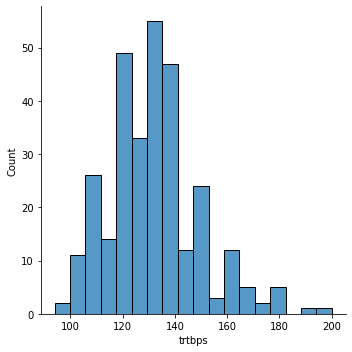

In [271]:
sns.displot(df["trtbps"])

In [175]:
result = spark1.sql("select chol, output, count(output) from heart group by chol, output order by 3 desc")
result.show()

+----+------+-------------+
|chol|output|count(output)|
+----+------+-------------+
| 226|     1|            4|
| 254|     0|            4|
| 282|     0|            4|
| 240|     1|            4|
| 234|     1|            4|
| 212|     0|            4|
| 204|     1|            4|
| 197|     1|            4|
| 211|     1|            4|
| 269|     1|            3|
| 201|     1|            3|
| 220|     1|            3|
| 245|     1|            3|
| 230|     0|            3|
| 229|     0|            3|
| 274|     0|            3|
| 303|     1|            3|
| 175|     1|            3|
| 199|     1|            3|
| 250|     1|            3|
+----+------+-------------+
only showing top 20 rows



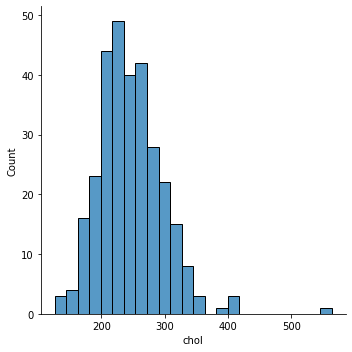

In [272]:
sns.displot(df["chol"])

In [178]:
result = spark1.sql("select thalachh, output, count(output) from heart group by thalachh, output order by 3 desc")
result.show()

+--------+------+-------------+
|thalachh|output|count(output)|
+--------+------+-------------+
|     162|     1|            8|
|     163|     1|            7|
|     172|     1|            7|
|     132|     0|            6|
|     152|     1|            6|
|     173|     1|            6|
|     150|     0|            5|
|     160|     1|            5|
|     125|     0|            5|
|     144|     0|            5|
|     178|     1|            5|
|     179|     1|            5|
|     182|     1|            4|
|     142|     0|            4|
|     151|     1|            4|
|     169|     1|            4|
|     140|     0|            4|
|     157|     1|            4|
|     143|     1|            4|
|     170|     1|            4|
+--------+------+-------------+
only showing top 20 rows



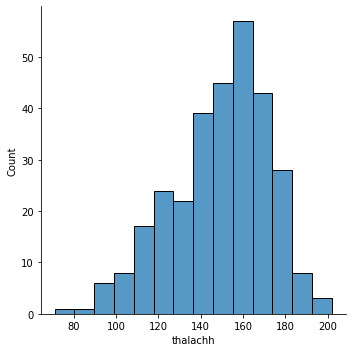

In [274]:
sns.displot(df["thalachh"])

In [181]:
result = spark1.sql("select oldpeak, output, count(output) from heart group by oldpeak, output order by 3 desc")
result.show()

+-------+------+-------------+
|oldpeak|output|count(output)|
+-------+------+-------------+
|    0.0|     1|           74|
|    0.0|     0|           25|
|    1.0|     0|           10|
|    0.6|     1|           10|
|    1.2|     0|           10|
|    0.2|     1|            9|
|    0.4|     1|            8|
|    0.8|     1|            7|
|    2.0|     0|            7|
|    1.2|     1|            7|
|    1.6|     1|            7|
|    1.4|     0|            7|
|    1.8|     0|            7|
|    1.4|     1|            6|
|    2.8|     0|            6|
|    0.8|     0|            6|
|    2.6|     0|            5|
|    1.0|     1|            4|
|    0.5|     1|            4|
|    1.5|     1|            4|
+-------+------+-------------+
only showing top 20 rows



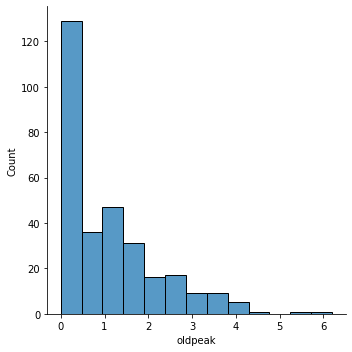

In [276]:
sns.displot(df["oldpeak"])

# **5. ML Method**

In [306]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [279]:
#df.drop(['sex'], axis = 1, inplace = True)

In [307]:
x_data = df.iloc[:,:-1]

In [308]:
x_data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [310]:
y_data = df.iloc[:,-1:]

In [311]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler;
#from pyspark.ml.classification import LogisticRegression
from sklearn.linear_model import LogisticRegression
from pyspark.ml import Pipeline

In [380]:
x_train, x_test, y_train, y_test = train_test_split(StandardScaler().fit_transform(x_data), y_data, test_size=0.2, random_state=40)

In [381]:
model = LogisticRegression()

In [382]:
model.fit(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [383]:
predictions = model.predict(x_test)

In [384]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print(confusion_matrix(y_test, predictions))

[[25  1]
 [ 0 35]]


In [385]:
print('Accuracy: %.3f' % accuracy_score(y_test, predictions))

Accuracy: 0.984


# **6. Deep Learning Method**

In [386]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [387]:
model = Sequential()
model.add(Dense(units=100, activation='relu', input_shape=(13,))) # First layer 
model.add(Dense(units=100, activation='relu')) # Second layer
model.add(Dense(units=1, activation='sigmoid')) # Output layer
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               1400      
_________________________________________________________________
dense_13 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 101       
Total params: 11,601
Trainable params: 11,601
Non-trainable params: 0
_________________________________________________________________


In [388]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [389]:
history = model.fit(x=x_train, y=y_train, epochs=50,validation_data=(x_test, y_test), verbose=1,batch_size=100) 

Epoch 1/50
3/3 [==============================] - 1s 75ms/step - loss: 0.7425 - accuracy: 0.4523 - val_loss: 0.6915 - val_accuracy: 0.6066
Epoch 2/50
3/3 [==============================] - 0s 13ms/step - loss: 0.6670 - accuracy: 0.6058 - val_loss: 0.6213 - val_accuracy: 0.7869
Epoch 3/50
3/3 [==============================] - 0s 12ms/step - loss: 0.6039 - accuracy: 0.7427 - val_loss: 0.5600 - val_accuracy: 0.8197
Epoch 4/50
3/3 [==============================] - 0s 11ms/step - loss: 0.5531 - accuracy: 0.7676 - val_loss: 0.5073 - val_accuracy: 0.8525
Epoch 5/50
3/3 [==============================] - 0s 10ms/step - loss: 0.5101 - accuracy: 0.7801 - val_loss: 0.4605 - val_accuracy: 0.8525
Epoch 6/50
3/3 [==============================] - 0s 15ms/step - loss: 0.4737 - accuracy: 0.7967 - val_loss: 0.4189 - val_accuracy: 0.8525
Epoch 7/50
3/3 [==============================] - 0s 12ms/step - loss: 0.4448 - accuracy: 0.8133 - val_loss: 0.3832 - val_accuracy: 0.8689
Epoch 8/50
3/3 [===========

In [390]:
y_pred = model.predict(x_test).reshape((-1,)) > 0.5
y_pred = y_pred.astype(np.int32)

In [391]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[23,  3],
       [ 3, 32]])

In [392]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        26
           1       0.91      0.91      0.91        35

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

